## Imports and Data Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter, FixedLocator, FormatStrFormatter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
df = pd.read_csv('/Users/tiffanivick/Workspace/Travelers_Analysis/Flight_Dataset.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Feature Descriptions 

Airline - airline company

Date of Journey - the date of travel

Source - the city of departure

Destination - the city of arrival

Route - city departing from -> city arriving to

Departure Time (military time) - the time in which the plane is expected to takeoff 

Arrival Time (military time) - the time in which the plane is expected to arrive

Duration (hour/minute) - the flight's estimated total length of time 

Total Stops - the total number of layovers before arriving at destination

Additional Info - additional information about the flight 

Price - the total price of the trip

In [3]:
# Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# Descriptive statistics of continuous data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df.shape

(10683, 11)

In [6]:
# Check for nulls
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As there are only a couple null values, we will drop the rows from the dataset.

In [7]:
# Drop nulls
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Cleaning

In [9]:
# Clean column titles
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
  new_cols.append(col.strip().replace(' ', ' ').replace(' ', '_').lower().replace('.', ''))
df.columns = new_cols

In [10]:
# Datatypes
df.dtypes

airline            object
date_of_journey    object
source             object
destination        object
route              object
dep_time           object
arrival_time       object
duration           object
total_stops        object
additional_info    object
price               int64
dtype: object

In [11]:
# Function to convert datatypes to datetime
def convert_to_datetime(col):
  df[col]= pd.to_datetime(df[col])

In [12]:
for i in ['date_of_journey', 'dep_time', 'arrival_time']:
  convert_to_datetime(i)

In [13]:
# Datatypes
df.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
route                      object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                   object
total_stops                object
additional_info            object
price                       int64
dtype: object

In [14]:
# Extract day and month from date_of_journey
df['day_of_journey'] = df['date_of_journey'].dt.day
df['month_of_journey'] = df['date_of_journey'].dt.month

In [15]:
df.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,day_of_journey,month_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-12-26 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-26 05:50:00,2022-12-26 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-26 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-12-26 18:05:00,2022-12-26 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-12-26 16:50:00,2022-12-26 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
df.drop('date_of_journey', axis=1, inplace=True)

In [17]:
# Function to extract hour and minutes 
def extract_hour(data, col):
  data[col + '_hour'] = data[col].dt.hour
  
def extract_minute(data, col):
  data[col + '_minute'] = data[col].dt.minute
  
def drop_col(data, col):
  data.drop(col, axis=1, inplace=True)

In [18]:
extract_hour(df, 'dep_time')

extract_minute(df, 'dep_time')

drop_col(df, 'dep_time')

In [19]:
extract_hour(df, 'arrival_time')

extract_minute(df, 'arrival_time')

drop_col(df, 'arrival_time')

In [20]:
df.head()

,airline,source,destination,route,duration,total_stops,additional_info,price,day_of_journey,month_of_journey,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Now we will apply pre-processing on the duration column by separating duration hours and minutes.

In [21]:
# Create a list of duration column
duration = list(df['duration'])

for i in range(len(duration)):
  if len(duration[i].split(' ')) == 2:  # Check if duration contains only hour
    pass
  else:
    duration[i] = duration[i] + ' 0m' # Add 0 minute

In [22]:
df['duration'] = duration

In [23]:
df.head()

,airline,source,destination,route,duration,total_stops,additional_info,price,day_of_journey,month_of_journey,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
# Function to extract hour
def hour(x):
  return x.split(' ')[0][0:-1]

# Function to extract minute
def minute(x):
  return x.split(' ')[1][0:-1]

In [25]:
df['dur_hour'] = df['duration'].apply(hour)

In [26]:
df['dur_minute'] = df['duration'].apply(minute)

In [27]:
df.head()

,airline,source,destination,route,duration,total_stops,additional_info,price,day_of_journey,month_of_journey,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dur_hour,dur_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [28]:
drop_col(df, 'duration')

In [29]:
df.dtypes

airline                object
source                 object
destination            object
route                  object
total_stops            object
additional_info        object
price                   int64
day_of_journey          int64
month_of_journey        int64
dep_time_hour           int64
dep_time_minute         int64
arrival_time_hour       int64
arrival_time_minute     int64
dur_hour               object
dur_minute             object
dtype: object

In [30]:
df['dur_hour'] = df['dur_hour'].astype(int)

df['dur_minute'] = df['dur_minute'].astype(int)

#### Finding the categorical values

In [31]:
categorical_col = [column for column in df.columns if df[column].dtype=='object']
categorical_col

['airline', 'source', 'destination', 'route', 'total_stops', 'additional_info']

#### Finding the continuous values

In [32]:
continuous_col = [column for column in df.columns if df[column].dtype!='object']
continuous_col

['price',
 'day_of_journey',
 'month_of_journey',
 'dep_time_hour',
 'dep_time_minute',
 'arrival_time_hour',
 'arrival_time_minute',
 'dur_hour',
 'dur_minute']

## Handling Categorical Data

We will use two main Encoding Techniques to convert categorical data into some numerical format:

1. Nominal data - classified without a normal order or rank

2. Ordinal data - has a predetermined or natural order

In [33]:
categorical = df[categorical_col]

In [34]:
categorical.head()

,airline,source,destination,route,total_stops,additional_info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [35]:
# Find the rows that contain the specific string
rows_to_drop = categorical[categorical["airline"].str.contains("Trujet")].index

# Drop the rows
categorical = categorical.drop(index=rows_to_drop)

In [36]:
categorical['airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: airline, dtype: int64

In [37]:
# Function to format money tick labels
def format_tick_labels(tick_labels):
    formatted_tick_labels = []
    for label in tick_labels:
        formatted_label = "$"
        label_str = str(label)
        for i, character in enumerate(reversed(label_str)):
            if i > 0 and i % 3 == 0:
                formatted_label += ","
            formatted_label += character
        formatted_tick_labels.append(formatted_label[::-1])
    return formatted_tick_labels

In [38]:
import textwrap

# Function to wrap long xtick labels 
def wrap_labels(ax, width, break_long_words=False):
  labels = []
  for label in ax.get_xticklabels():
      text = label.get_text()
      labels.append(textwrap.fill(text, width=width,
                    break_long_words=break_long_words))
  ax.set_xticklabels(labels, rotation=0)

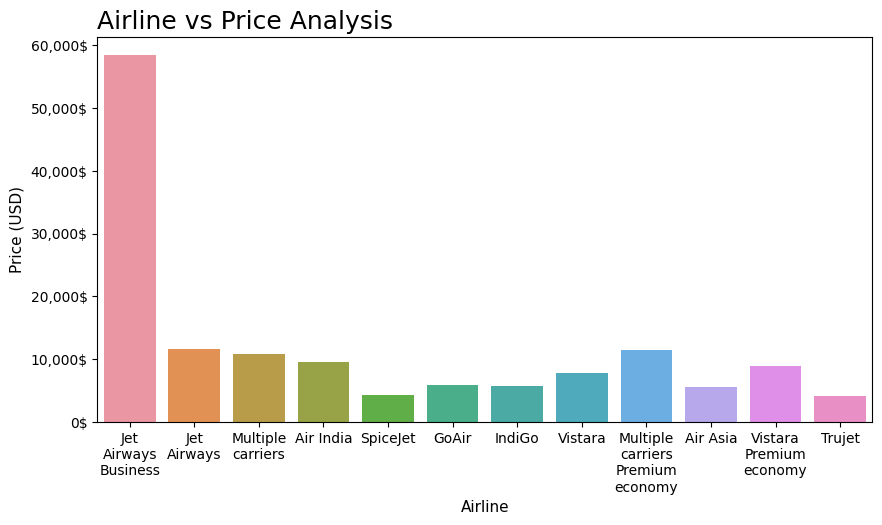

In [39]:
# Create plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='airline', y='price', data=df.sort_values('price', ascending=False), errorbar=None)

ax.set_title('Airline vs Price Analysis', fontsize=16, loc='left')
ax.set_xlabel('Airline', fontsize=14)
ax.set_ylabel('Price (USD)', fontsize=14)

# Extract the tick labels from the dataframe
# tick_labels = df['price'].tolist()

# Format tick labels
tick_labels = [0, 10000, 20000, 30000, 40000, 50000, 60000]
formatted_tick_labels = format_tick_labels(tick_labels)

# Set the tick labels
ax.set_yticklabels(formatted_tick_labels)

# Call the function
wrap_labels(ax, 10)

plt.show()

From the graph we can clearly see that Jet Airways Business have the highest ticket prices, whereas SpiceJet have the lowest ticket prices.

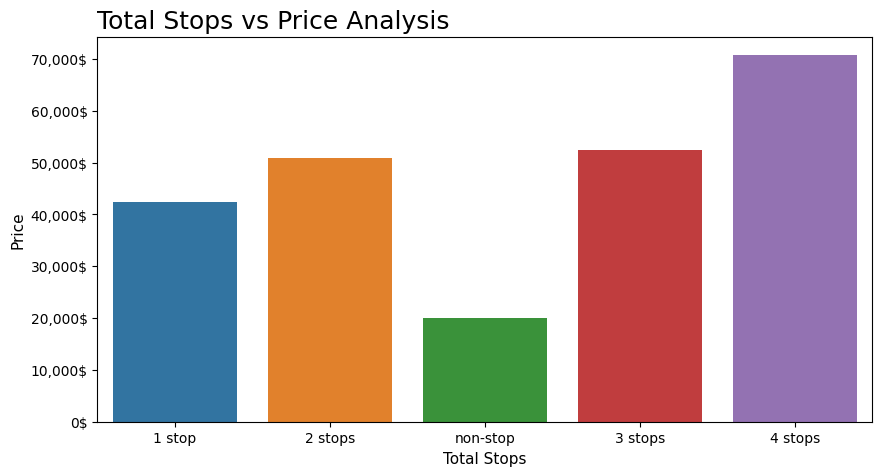

In [40]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='total_stops', y='price', data=df.sort_values('price', ascending=False), errorbar=None)
ax.set_title('Total Stops vs Price Analysis', fontsize=16, loc='left')
ax.set_xlabel('Total Stops', fontsize=14)
ax.set_ylabel('Price', fontsize=14)


# Format tick labels
tick_labels = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
formatted_tick_labels = format_tick_labels(tick_labels)

# Set the tick labels
ax.set_yticklabels(formatted_tick_labels)

plt.show()

From the graph, we can see how the tickets prices increase as the number of stops increase.

Most machine learning algorithms cannot work with categorical data and needs to be converted into numerical data. To deal with this issue, we will use *One Hot Encoding* technique - where the categorical parameters will prepare separate columns.

In [41]:
# As airlines is Nominal Categorical data we will perform OneHotEncoding
airline = pd.get_dummies(categorical['airline'], drop_first=True)

In [42]:
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [43]:
categorical['source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: source, dtype: int64

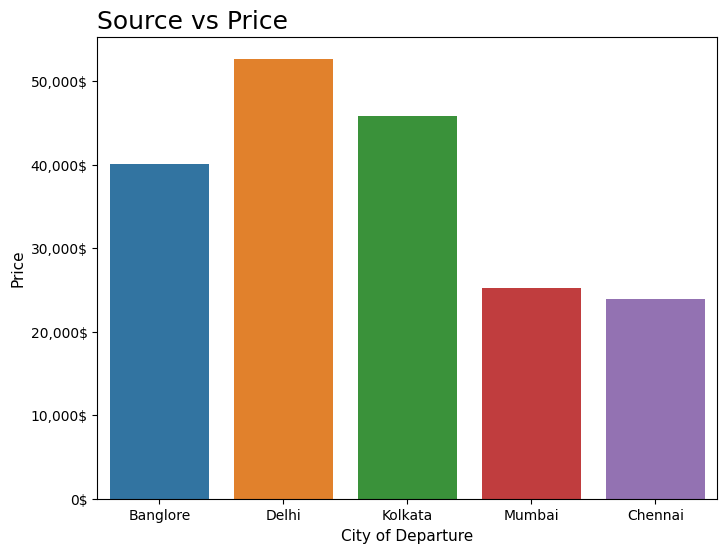

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='source', y='price', data=df.sort_values('price', ascending=False), errorbar=None)
ax.set_title('Source vs Price', fontsize=16, loc='left')
ax.set_xlabel('City of Departure', fontsize=14)
ax.set_ylabel('Price', fontsize=14)


# Format tick labels
tick_labels = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
formatted_tick_labels = format_tick_labels(tick_labels)

# Set the tick labels
ax.set_yticklabels(formatted_tick_labels)

plt.show()

Delhi is the most expensive to fly to, whereas Chennai is the cheapest city to fly to.

In [45]:
# Encoding of souce column
source = pd.get_dummies(categorical['source'], drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [46]:
categorical['destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: destination, dtype: int64

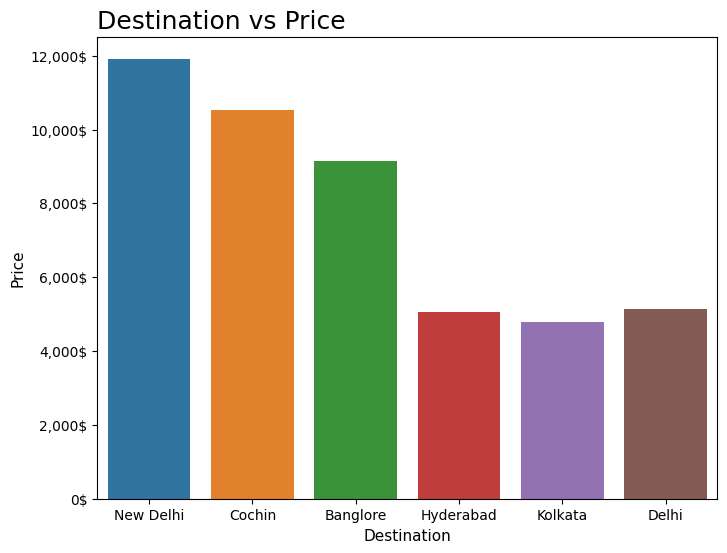

In [47]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='destination', y='price', data=df.sort_values('price', ascending=False), errorbar=None)
ax.set_title('Destination vs Price', fontsize=16, loc='left')
ax.set_xlabel('Destination', fontsize=14)
ax.set_ylabel('Price', fontsize=14)


# Format tick labels
tick_labels = [0, 2000, 4000, 6000, 8000, 10000, 12000]
formatted_tick_labels = format_tick_labels(tick_labels)

# Set the tick labels
ax.set_yticklabels(formatted_tick_labels)

plt.show()

New Delhi is the most expensive destination to fly in to, while Kolkata is the cheapest destination to fly in to. 

In [48]:
# Encoding of destination column
destination = pd.get_dummies(categorical['destination'], drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [49]:
categorical['route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → RPR → HYD → BLR       1
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → BBI → HYD             1
Name: route, Length: 127, dtype: int64

In [50]:
categorical['route_1']=categorical['route'].str.split('→').str[0]
categorical['route_2']=categorical['route'].str.split('→').str[1]
categorical['route_3']=categorical['route'].str.split('→').str[2]
categorical['route_4']=categorical['route'].str.split('→').str[3]
categorical['route_5']=categorical['route'].str.split('→').str[4]

In [51]:
categorical.head()

,airline,source,destination,route,total_stops,additional_info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [52]:
drop_col(categorical, 'route')

In [53]:
categorical.isnull().sum()

airline                0
source                 0
destination            0
total_stops            0
additional_info        0
route_1                0
route_2                0
route_3             3491
route_4             9115
route_5            10635
dtype: int64

In [54]:
categorical.columns

Index(['airline', 'source', 'destination', 'total_stops', 'additional_info',
       'route_1', 'route_2', 'route_3', 'route_4', 'route_5'],
      dtype='object')

Since there are quite a few nulls in route_3, route_4 and route_5, so we will fill these in the None.

In [55]:
for i in ['route_3', 'route_4', 'route_5']:
  categorical[i].fillna('None', inplace=True)

In [56]:
categorical.isnull().sum()

airline            0
source             0
destination        0
total_stops        0
additional_info    0
route_1            0
route_2            0
route_3            0
route_4            0
route_5            0
dtype: int64

In [57]:
for i in categorical.columns:
  print('{} has a total of {} categories'.format(i, len(categorical[i].value_counts())))

airline has a total of 11 categories
source has a total of 5 categories
destination has a total of 6 categories
total_stops has a total of 5 categories
additional_info has a total of 10 categories
route_1 has a total of 5 categories
route_2 has a total of 44 categories
route_3 has a total of 30 categories
route_4 has a total of 14 categories
route_5 has a total of 6 categories


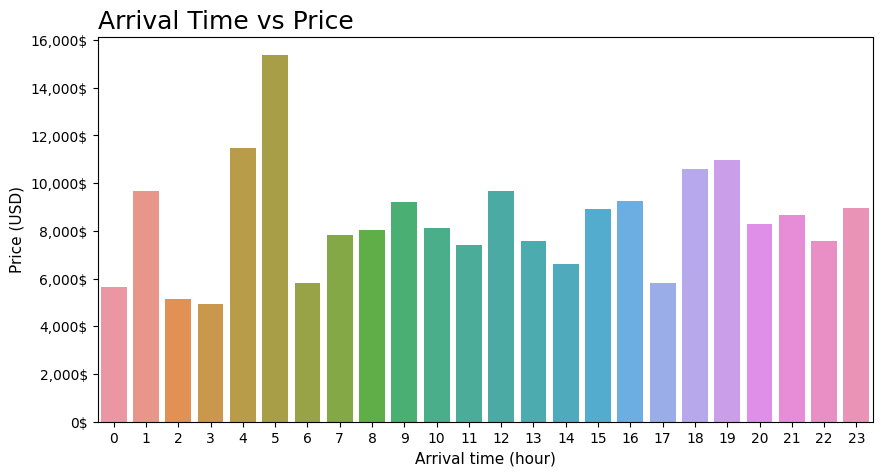

In [58]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='arrival_time_hour', y='price', data=df, errorbar=None)
ax.set_title('Arrival Time vs Price', fontsize=18, loc='left')
ax.set_xlabel('Arrival time (hour)', fontsize=11)
ax.set_ylabel('Price (USD)', fontsize=11)

# Format tick labels
tick_labels = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
formatted_tick_labels = format_tick_labels(tick_labels)

# Set the tick labels
ax.set_yticklabels(formatted_tick_labels)

plt.show()

The most expensive arrival time is at 5, while the cheapest arrival time is at 3.

In [59]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [60]:
for i in ['route_1', 'route_2', 'route_3', 'route_4', 'route_5']:
  categorical[i] = encoder.fit_transform(categorical[i])

In [61]:
categorical.head()

,airline,source,destination,total_stops,additional_info,route_1,route_2,route_3,route_4,route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [62]:
drop_col(categorical, 'additional_info')

In [63]:
categorical['total_stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [64]:
# Encoding Total Stops
total_stops_dict = {'non-stop':0,'2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['total_stops'] = categorical['total_stops'].map(total_stops_dict)

In [65]:
categorical['total_stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: total_stops, Length: 10681, dtype: int64

In [66]:
drop_col(categorical, 'source')
drop_col(categorical, 'destination')
drop_col(categorical, 'airline')

## Prepare Data for Modeling

Now that all the preprocessing is finished, we will now do the finishing touches to get the data ready for modeling.

In [67]:
final_df=pd.concat([categorical,airline,source,destination,df[continuous_col]],axis=1)

In [68]:
pd.set_option('display.max_columns', 33)
final_df.head()

,total_stops,route_1,route_2,route_3,route_4,route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,price,day_of_journey,month_of_journey,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dur_hour,dur_minute
0,0.0,0.0,13.0,29.0,13.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3897,24,3,22,20,1,10,2,50
1,2.0,2.0,25.0,1.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7662,5,1,5,50,13,15,7,25
2,2.0,3.0,32.0,4.0,5.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13882,6,9,9,25,4,25,19,0
3,1.0,2.0,34.0,3.0,13.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6218,5,12,18,5,23,30,5,25
4,1.0,0.0,34.0,8.0,13.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13302,3,1,16,50,21,35,4,45


### Check for Outliers

In [69]:
def plot_data(df, col):
    # Create a figure and a subplot
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Create a distplot on the first subplot
    sns.distplot(df[col], ax=ax[0])
    ax[0].set_title('Distribution of {}'.format(col), fontsize=16)
    ax[0].set_xlabel(col, fontsize=14)
    ax[0].set_ylabel('Frequency', fontsize=14)
    
    # Create a boxplot on the second subplot
    sns.boxplot(df[col], ax=ax[1])
    ax[1].set_title('Boxplot of {}'.format(col), fontsize=16)
    ax[1].set_xlabel(col, fontsize=14)
    ax[1].set_ylabel('Values', fontsize=14)
    
    plt.tight_layout(pad=2.0)
    # Show the plot
    plt.show()

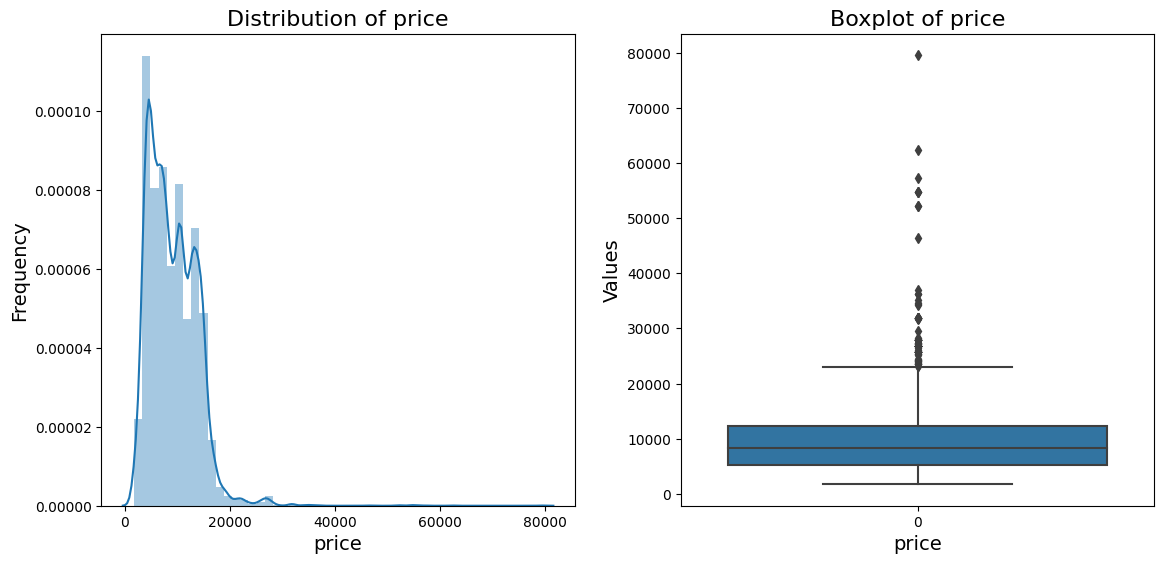

In [70]:
plot_data(final_df, 'price')

### Handling Outliers

As there are some outliers in price feature, we will replace with the median.

In [71]:
# Replace outliers with median of column
final_df['price'] = np.where(final_df['price']>=40000, final_df['price'].median(), final_df['price'])

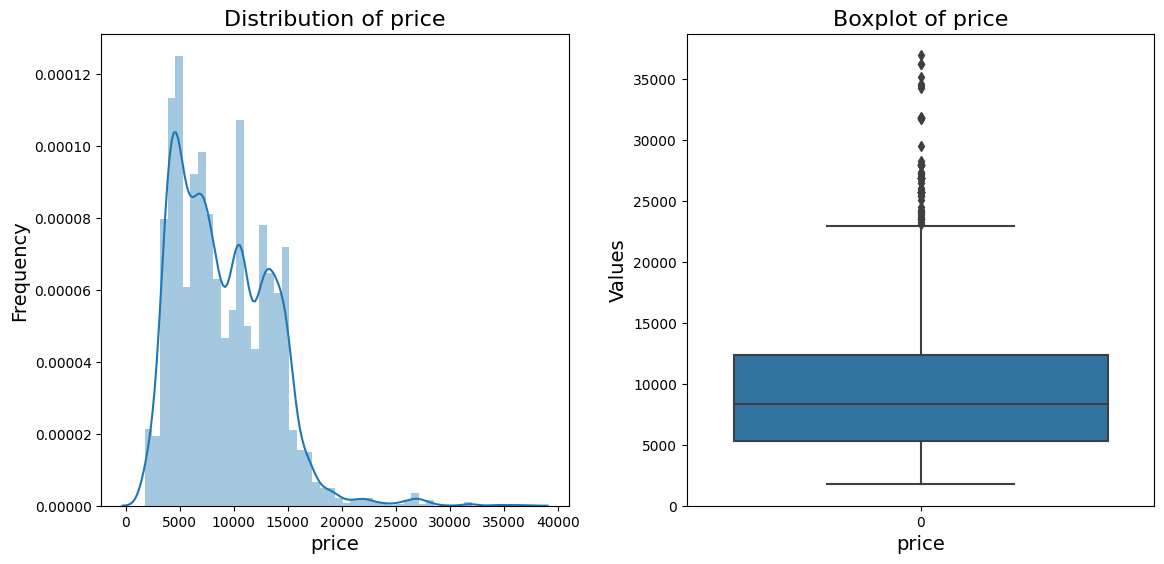

In [72]:
plot_data(final_df, 'price')

In [73]:
# Extract the features and target variable
X = final_df.drop('price', axis=1)
y = df['price']

In [74]:
X.shape

(10682, 33)

In [75]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(imputed, columns=X.columns)

X_imputed

,total_stops,route_1,route_2,route_3,route_4,route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,day_of_journey,month_of_journey,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dur_hour,dur_minute
0,0.000000,0.000000,13.000000,29.000000,13.000000,5.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0
1,2.000000,2.000000,25.000000,1.000000,3.000000,5.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,1.0,5.0,50.0,13.0,15.0,7.0,25.0
2,2.000000,3.000000,32.000000,4.000000,5.000000,5.000000,0.000000,0.000000,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.0,9.0,9.0,25.0,4.0,25.0,19.0,0.0
3,1.000000,2.000000,34.000000,3.000000,13.000000,5.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,12.0,18.0,5.0,23.0,30.0,5.0,25.0
4,1.000000,0.000000,34.000000,8.000000,13.000000,5.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0,1.0,16.0,50.0,21.0,35.0,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0.000000,2.000000,5.000000,29.000000,13.000000,5.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.0,4.0,20.0,45.0,23.0,20.0,2.0,35.0
10678,0.000000,0.000000,13.000000,29.000000,13.000000,5.000000,0.000000,0.000000,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,27.0,4.0,8.0,20.0,11.0,20.0,3.0,0.0
10679,0.000000,0.000000,13.000000,29.000000,13.000000,5.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0,1.0,11.0,30.0,14.0,10.0,2.0,40.0
10680,2.000000,3.000000,16.000000,4.000000,5.000000,5.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.0,9.0,10.0,55.0,19.0,15.0,8.0,20.0


In [76]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # Setting the random_state argument for reproducibility
# imputer = IterativeImputer(random_state=123)
# imputed = imputer.fit_transform(X)
# X_imputed = pd.DataFrame(imputed, columns=X.columns)

# print(round(X_imputed, 2))


In [77]:
# from sklearn.impute import SimpleImputer

# # Mean Imputation
# mean_imputer = SimpleImputer(strategy='mean')
# mean_imputed = mean_imputer.fit_transform(X)
# df_mean_imputed = pd.DataFrame(mean_imputed, columns=X.columns)

# # Median Imputation
# median_imputer = SimpleImputer(strategy='median')
# median_imputed = median_imputer.fit_transform(X)
# df_median_imputed = pd.DataFrame(median_imputed, columns=X.columns)

In [78]:
# from sklearn.metrics import mean_squared_error

# # Plotting a comparison between the different strategies
# fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12, 10))
# axes = np.reshape(axes, -1)

# dfs = [df_mean_imputed, df_median_imputed, X]
# titles = ['Mean Imputation', 'Median Imputation', 'Iterative Imputation']

# for i, df in enumerate(dfs):
#     # Plotting the data
#     x = df.total_stops
#     y = df.arrival_time_minute
#     sns.scatterplot(x, ax=axes[i], color='green')
    
#     # Fitting and plotting a linear regression line
#     m, b = np.polyfit(x, y, 1)
#     linreg = m*x + b
#     axes[i].plot(x, linreg, color='black')
    
#     # Setting the titles and including the RMSE values
#     axes[i].set_title(titles[i], fontsize=16, fontweight='bold')
#     rmse = round(mean_squared_error(y, linreg, squared=False), 3)
#     axes[i].text(500, 10, f'RMSE: {rmse}', fontsize=14, fontweight='bold')

In [79]:
# X.isnull().sum()

In [80]:
# X.fillna(method = 'ffill', inplace = True)

In [81]:
# X.isnull().sum()

### Feature Selection

This is about finding the best features to use that have a good relationship with the independent variable.

For this we will use mutual_info_classif

In [82]:
from sklearn.feature_selection import mutual_info_classif

In [83]:
# Assigning X to the imputed version of X
X = X_imputed

# Calculate mutual information scores
mutual_info_classif(X, y)

array([0.47560264, 0.26621823, 0.3259936 , 0.26171219, 0.84018405,
       0.72400151, 0.07418449, 0.        , 0.08754892, 0.13583661,
       0.01750796, 0.05292739, 0.00132224, 0.02833514, 0.0355561 ,
       0.        , 0.02149267, 0.28294386, 0.11532519, 0.01881925,
       0.28402493, 0.04115752, 0.0158374 , 0.02920511, 0.04160328,
       0.11417557, 0.1133715 , 0.11486949, 0.1035788 , 0.1804505 ,
       0.14525466, 0.17496868, 0.10381022])

In [84]:
imp_df = pd.DataFrame(mutual_info_classif(X, y), index=X.columns)
imp_df

,0
total_stops,0.488668
route_1,0.249066
route_2,0.351273
route_3,0.264632
route_4,0.824452
route_5,0.773006
Air India,0.049915
GoAir,0.000000
IndiGo,0.106006
Jet Airways,0.139895


In [85]:
imp_df.columns = ['importance']
imp_df.sort_values(by='importance', ascending=False)

,importance
route_4,0.824452
route_5,0.773006
total_stops,0.488668
route_2,0.351273
Cochin,0.291898
Delhi,0.288677
route_3,0.264632
route_1,0.249066
arrival_time_hour,0.170301
dur_hour,0.163288


Since there are a few features that have approx. 0 value so they will be removed after authorizing it.

### Modeling

In [86]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

MAE, MSE, and RMSE are performance metrics used to evaluate the accuracy of a model's predictions.

The **mean absolute error (MAE)** is calculated as the average of the absolute difference between the true values and the predicted values.

The **mean squared error (MSE)** is calculated as the average of the squared difference between the true values and the predicted values.

The **root mean squared error (RMSE)** is the square root of the mean squared error (MSE), which is calculated as the average of the squared differences between the true values and the predicted values.

In [87]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Function to predict ML model accuracy with the data
def predict_model(ml_model):
  print('Model is: {}'.format(ml_model))
  model= ml_model.fit(X_train,y_train)
  print("Training score: {}".format(model.score(X_train,y_train)))
  predictions = model.predict(X_test)
  print("Predictions are: {}".format(predictions))
  print('\n')
  # Calculate the R-squared score
  r2score=r2_score(y_test,predictions) 
  print("r2 score is: {}".format(r2score))
  
  # Calculate the mean absolute error     
  print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
  # Calculate the mean squared error 
  print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
  # Calculate the root mean squared error
  print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
    
  sns.displot(y_test-predictions, height=4, aspect=1.5)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

A **random forest regressor** is an ensemble learning method that combines the predictions of multiple decision tree regressors to produce a more accurate and stable prediction. It works by training a large number of decision trees on random subsets of the training data, and then average the predictions of these decision trees to make a final prediction. 

Model is: RandomForestRegressor()
Training score: 0.7643322966291164
Predictions are: [10085.62916667 11477.00583333 13811.04166667 ... 12396.076
  7373.23333333  9072.27166667]


r2 score is: -0.18869569145440956
MAE:3729.9215369572453
MSE:22889140.944880456
RMSE:4784.259707089536


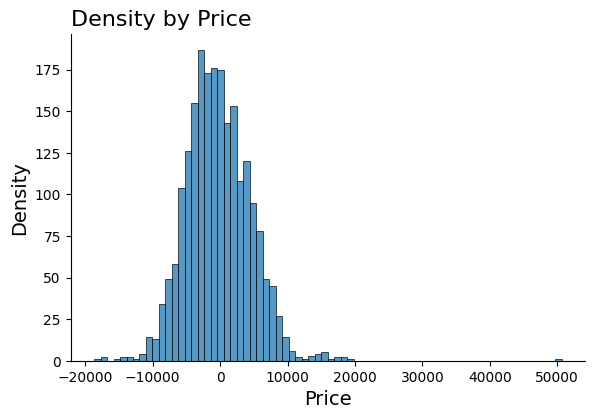

In [89]:
# Predict using RandomForestRegressor model
predict_model(RandomForestRegressor())
plt.title('Density by Price', fontsize=16, loc='left')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

From the r2 score we can see that we predicted 84% correctly.

**Logistic regression** is a classification algorithm used to predict a binary outcome (i.e., a outcome that can only have two possible values, such as 0 or 1, yes or no, true or false). It is a statistical method that uses a logistic function to model a binary dependent variable based on one or more independent variables.

Model is: LogisticRegression()
Training score: 0.07302516091281451
Predictions are: [10844 10844 10844 ...  9663 10844 22096]


r2 score is: -0.7853520552543864
MAE:4107.9443144595225
MSE:34378163.49695835
RMSE:5863.28947749967


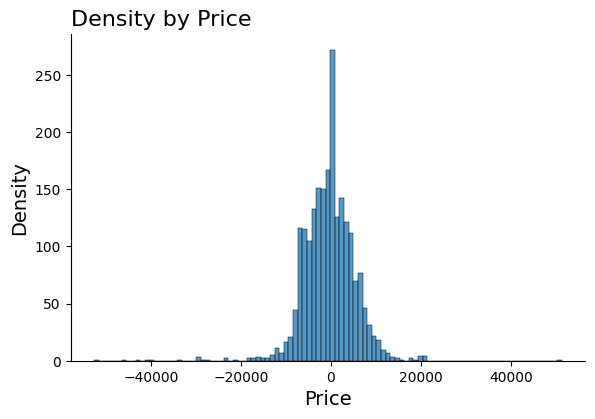

In [90]:
# Predict using LogisticRegression model
predict_model(LogisticRegression())
plt.title('Density by Price', fontsize=16, loc='left')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

**KNeighborsRegressor** is a regressor based on the k-nearest neighbors algorithm. It is a non-parametric method used for regression, meaning that it does not make any assumptions about the underlying distribution of the data.

The KNeighborsRegressor class is part of the sklearn library in Python. It can be used to predict a continuous target variable based on a feature matrix. It works by finding the k nearest neighbors of a given data point, and using the mean of those neighbors as the prediction for the target variable.

Model is: KNeighborsRegressor()
Training score: 0.24359687988051737
Predictions are: [12650.4 11464.8 12276.8 ...  8303.4  9344.4  9545. ]


r2 score is: -0.15323986563648995
MAE:3666.131867103416
MSE:22206414.995507717
RMSE:4712.368300070329


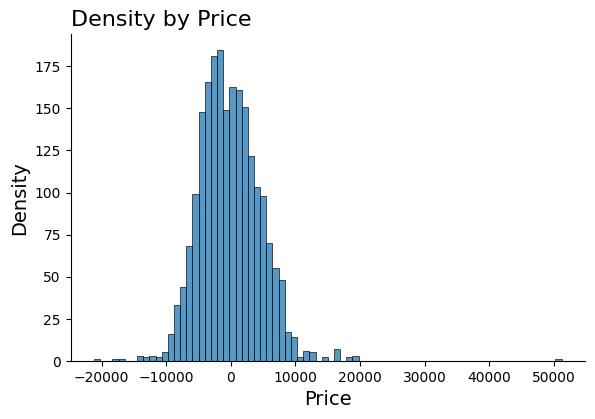

In [91]:
# Predict using KNeighborsRegressor model
predict_model(KNeighborsRegressor())
plt.title('Density by Price', fontsize=16, loc='left')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

**DecisionTreeRegressor** works by constructing a decision tree, which is a flowchart-like structure in which an internal node represents feature (or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is the root node. Decision trees can handle high-dimensional data and can be used to make predictions for both classification and regression problems.

To make a prediction using a decision tree, the model starts at the root node and follows the decision rules defined in the tree until it reaches a leaf node, which contains the prediction. The model uses the features of the input data to determine which branch to follow at each node in the tree.

Model is: DecisionTreeRegressor()
Training score: 0.8822681817125285
Predictions are: [ 9653. 10953. 15554. ... 14151.  7912.  8137.]


r2 score is: -1.0250964466768098
MAE:4612.89998440181
MSE:38994604.19365024
RMSE:6244.565973200239


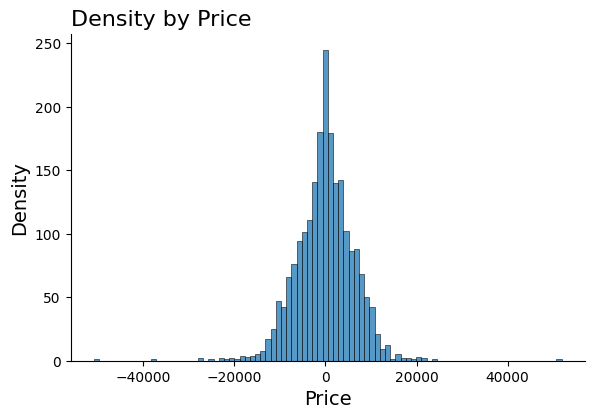

In [92]:
# Predict using DecisionTreeRegressor model
predict_model(DecisionTreeRegressor())
plt.title('Density by Price', fontsize=16, loc='left')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Support vecotor regression (SVR) is a type of support vector machine (SVM), which is a supervised learning algorithm that can be used for both classification and regression tasks. The goal is to find a hyperpane in a high-dimensional feature space that maximally separates the data points into their respective classes or target values. The hyperplane is chosen such that it maximally separates the data points from one another, while also maximizing the distance between the hyperplane and the nearest data points (the "support vectors").

SVR is a powerful and flexible model that can handle both linear and nonlinear relationships in the data. It is particularly well-suited for cases where the data is noisy or has outlier values.

Model is: SVR()
Training score: -0.021090814224286714
Predictions are: [8394.03772319 8437.40036119 8430.7821917  ... 8460.54615931 8451.16407731
 8483.2863372 ]


r2 score is: -0.012301979204327296
MAE:3499.2024947168416
MSE:19492560.499179672
RMSE:4415.0379952135945


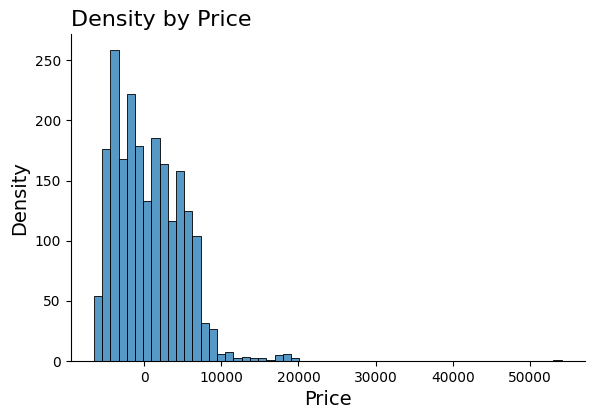

In [93]:
from sklearn.svm import SVR 

# Predict using SVR model
predict_model(SVR())
plt.title('Density by Price', fontsize=16, loc='left')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


Model is: GradientBoostingRegressor()
Training score: 0.10077684917751684
Predictions are: [ 9566.86117183 10389.09211766  9996.58758626 ...  9704.75594469
 10158.76089767 10166.29919648]


r2 score is: 0.039410905650726136
MAE:3408.0962934961517
MSE:18496793.863006003
RMSE:4300.789911516953


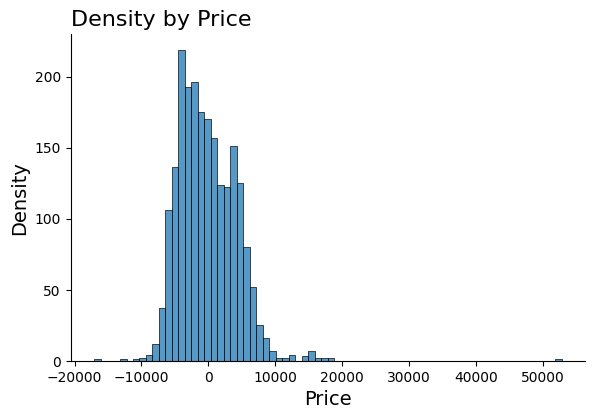

In [94]:
# Predict using GradientBoostingRegressor model
predict_model(GradientBoostingRegressor())
plt.title('Density by Price', fontsize=16, loc='left')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

As RandomForestRegressor model had the highest accuracy, we will use this algorithm to build the model.

### Hypertuning the Model

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
random_grid = {
  'n_estimators': [100, 120, 150, 180, 200, 220],
  'max_features': [1.0, 'sqrt'],
  'max_depth': [5, 10, 15, 20]
}

In [97]:
# Build the model
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=5, max_features=1.0, n_estimators=150; total time=   1.0s
[CV] END ....max_depth=5, max_features=1.0, n_estimators=150; total time=   1.0s
[CV] END ....max_depth=5, max_features=1.0, n_estimators=180; total time=   1.3s
[CV] END ....max_depth=5, max_features=1.0, n_estimators=180; total time=   1.3s
[CV] END ....max_depth=5, max_features=1.0, n_estimators=180; total time=   1.1s
[CV] END ..max_depth=20, max_features=sqrt, n_es

{'n_estimators': 120, 'max_features': 1.0, 'max_depth': 5}

In [98]:
# Best parameter
rf_random.best_params_

{'n_estimators': 120, 'max_features': 1.0, 'max_depth': 5}

<Figure size 1000x500 with 0 Axes>

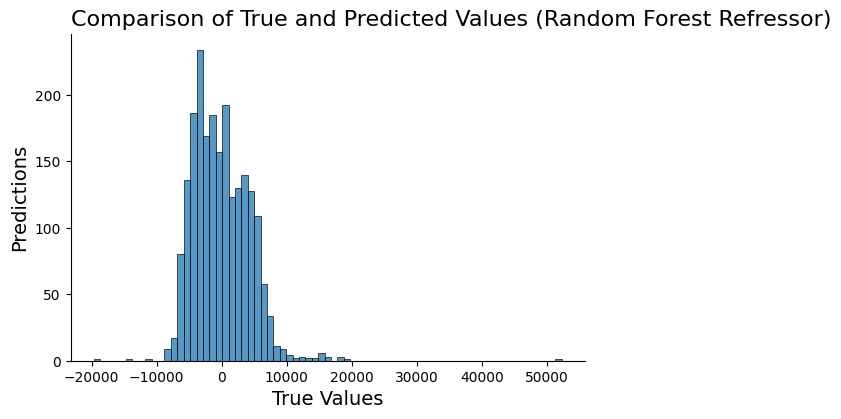

In [99]:
# Make predictions on the test set
prediction = rf_random.predict(X_test)

# Distribution plot between actual value and predicted value
plt.figure(figsize=(10,5))
sns.displot(y_test-prediction, height=4, aspect=1.5)
plt.title('Comparison of True and Predicted Values (Random Forest Refressor)', fontsize=16, loc='left')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.show()